In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
df = pd.read_csv(r"D:\csv\insurance_data_700.csv")
df

,age,bought_insurance
0,56,0
1,46,0
2,32,0
3,60,1
4,25,0
...,...,...
695,28,1
696,29,0
697,27,0
698,49,1


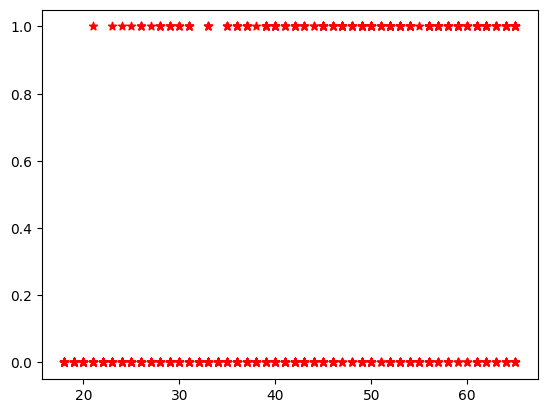

In [6]:
plt.scatter(df.age, df.bought_insurance, marker='*', color='red')

In [7]:
df.shape

(700, 2)

In [8]:
from sklearn.model_selection import train_test_split
X = df[['age']]
y = df.bought_insurance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [9]:
X_test

,age
47,43
638,34
106,52
183,30
500,21
...,...
24,50
348,23
449,18
342,34


In [10]:
X_train

,age
59,53
587,31
408,19
97,26
595,42
...,...
555,52
399,25
51,64
412,42


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
#accuracy score on test data on how well the model performed using x_test 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [14]:
#accuracy score on test data because the data size is small
model.score(X_test, y_test)

0.6785714285714286

In [15]:
#class1 & class2 probabilities
#not bought & bought insurance x_test
model.predict_proba(X_test)

array([[0.64379428, 0.35620572],
       [0.78544255, 0.21455745],
       [0.47154871, 0.52845129],
       [0.83359987, 0.16640013],
       [0.91028806, 0.08971194],
       [0.84419527, 0.15580473],
       [0.47154871, 0.52845129],
       [0.47154871, 0.52845129],
       [0.90367441, 0.09632559],
       [0.92773616, 0.07226384],
       [0.37612259, 0.62387741],
       [0.81069217, 0.18930783],
       [0.58821822, 0.41178178],
       [0.54977465, 0.45022535],
       [0.69574925, 0.30425075],
       [0.75783118, 0.24216882],
       [0.92229901, 0.07770099],
       [0.91648958, 0.08351042],
       [0.53029737, 0.46970263],
       [0.92229901, 0.07770099],
       [0.79836261, 0.20163739],
       [0.8811608 , 0.1188392 ],
       [0.75783118, 0.24216882],
       [0.67889864, 0.32110136],
       [0.47154871, 0.52845129],
       [0.84419527, 0.15580473],
       [0.28943096, 0.71056904],
       [0.87270015, 0.12729985],
       [0.64379428, 0.35620572],
       [0.24353131, 0.75646869],
       [0.

In [16]:
# The ROC curve is based on the probabilities
y_pred_proba = model.predict_proba(X_test)[::,1]



In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


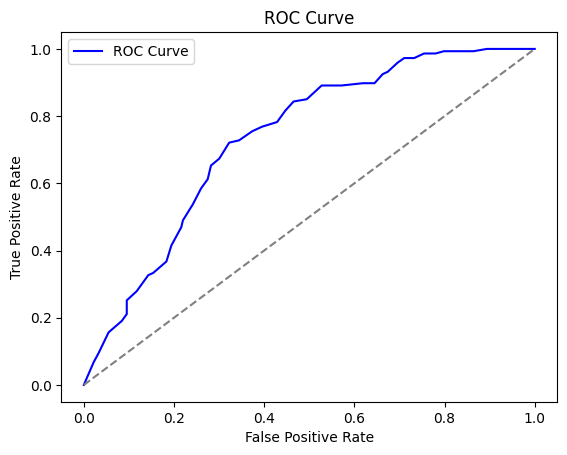

In [18]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [19]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)


AUC Score: 0.7346066631780918
